In [ ]:
#!pip install lorem
#!pip install pillow
from PIL import Image
import pandas as pd
import lxml.etree
import requests
import pickle
import pprint
import lorem
import json

data_dir = 'C:/Users/werne/Documents/NSQL/data'

# Exercise

####  1 : Lorem Ipsum is just a random txt that devs use as a placeholder for multiple things (especially web developping) when you don't have the real text and just want to test your functionnality. Put a [Lorem Ipsum](https://www.lipsum.com/) of 3 paragraphs in a txt file using python, each paragraph delimited by two new line.

In [2]:
text = "\n\n\n".join(lorem.paragraph() for _ in range(3))

with open(data_dir+'lorem_ipsum.txt', 'w') as f:
    f.write(text)

print(text)

Tempora numquam neque quaerat. Magnam voluptatem ut dolor etincidunt. Sit neque neque amet non sed. Voluptatem quaerat sit quaerat amet est consectetur. Quiquia etincidunt eius dolore non aliquam. Velit amet ut non tempora. Porro etincidunt voluptatem porro tempora neque porro. Dolore consectetur quiquia porro quiquia amet quisquam voluptatem. Sit est dolore adipisci dolore tempora amet. Ipsum dolor dolorem numquam dolorem quaerat etincidunt consectetur.


Etincidunt non dolor ipsum dolorem quaerat. Labore ut dolore est ipsum labore modi. Eius tempora sed etincidunt porro magnam. Quiquia non est eius velit quisquam. Ipsum porro labore non est quaerat.


Voluptatem sed ipsum dolorem quaerat magnam aliquam. Ut non quisquam voluptatem. Dolorem est porro porro. Sed velit ut etincidunt velit neque modi dolor. Quaerat dolor dolorem aliquam magnam. Adipisci eius voluptatem sit ut dolore. Sit dolorem sed labore eius eius adipisci. Eius labore sed dolorem consectetur. Consectetur est non tempor

#### 2 : Update the txt file by removing the first paragraph.

In [3]:
with open(data_dir+'lorem_ipsum.txt', "r") as f:
    lines = f.readlines()

with open(data_dir+'lorem_ipsum.txt', "w") as f:
    for line in lines[3:]:    
        f.write(line)

#### 3 : Create a dict from the paper of [lecun et al.](https://www.researchgate.net/publication/277411157_Deep_Learning) and [goodfellow et al.](https://arxiv.org/abs/1406.2661) with authors, title, affiliations.

In [4]:
papers_dict = {
    "Lecun et al.": {
        "authors": ["Yann Lecun", "Yoshua Bengio", "Geoffrey Hinton"],
        "title": "Deep Learning",
        "affiliations": ["Facebook AI Research",
                         "New York University",
                         "Université de Montréal",
                         "Google",
                         "University of Toronto"]
    },
    "Goodfellow et al.": {
        "authors": ["Ian Goodfellow",
                    "Jean Pouget-Abadie",
                    "Mehdi Mirza",
                    "Bing Xu",
                    "David Warde-Farley",
                    "Sherjil Ozair",
                    "Aaron Courville",
                    "Yoshua Bengio"],
        "title": "Generative Adversarial Networks",
        "affiliations": ["Université de Montréal"]
    }
}

#### 4 : Save the previously created dict in the JSON format and load it back.

In [5]:
with open(data_dir+'data_paper.json', 'w') as fp:
    json.dump(papers_dict, fp)
    
with open(data_dir+'data_paper.json', 'r') as fp:
    loaded_data = json.load(fp)

pprint.pprint(loaded_data, sort_dicts=False)

{'Lecun et al.': {'authors': ['Yann Lecun', 'Yoshua Bengio', 'Geoffrey Hinton'],
                  'title': 'Deep Learning',
                  'affiliations': ['Facebook AI Research',
                                   'New York University',
                                   'Université de Montréal',
                                   'Google',
                                   'University of Toronto']},
 'Goodfellow et al.': {'authors': ['Ian Goodfellow',
                                   'Jean Pouget-Abadie',
                                   'Mehdi Mirza',
                                   'Bing Xu',
                                   'David Warde-Farley',
                                   'Sherjil Ozair',
                                   'Aaron Courville',
                                   'Yoshua Bengio'],
                       'title': 'Generative Adversarial Networks',
                       'affiliations': ['Université de Montréal']}}


#### 5 : Save the previously created dict in the pickle format. Try to open manually (i.e with a text editor), is it human readable ?

In [6]:
with open(data_dir+'dict_data.pickle', 'wb') as pkl:
    pickle.dump(papers_dict, pkl, protocol=pickle.HIGHEST_PROTOCOL)

print("No, binary files are not human-readable.\n")

with open(data_dir+'dict_data.pickle', 'rb') as pkl:
    pprint.pprint(pickle.load(pkl), sort_dicts=False)

No, binary files are not human-readable.

{'Lecun et al.': {'authors': ['Yann Lecun', 'Yoshua Bengio', 'Geoffrey Hinton'],
                  'title': 'Deep Learning',
                  'affiliations': ['Facebook AI Research',
                                   'New York University',
                                   'Université de Montréal',
                                   'Google',
                                   'University of Toronto']},
 'Goodfellow et al.': {'authors': ['Ian Goodfellow',
                                   'Jean Pouget-Abadie',
                                   'Mehdi Mirza',
                                   'Bing Xu',
                                   'David Warde-Farley',
                                   'Sherjil Ozair',
                                   'Aaron Courville',
                                   'Yoshua Bengio'],
                       'title': 'Generative Adversarial Networks',
                       'affiliations': ['Université de Mont

#### 6 : Parse the xml_file2 in the same way as in the lecture. put infos in a dict and save it in a json file.

In [7]:
xml_file = data_dir+"xml_file2.nxml"
root = lxml.etree.parse(xml_file)

destinataire = root.xpath("//to//text()")[0]
expediteur = root.xpath("//from//text()")[0]
date = root.xpath("//date//text()")[0]
hour = root.xpath("//hour//text()")[0]
body = root.xpath("//body//text()")[0]


msg_dict = {'note': {'date': date,
                  'hour': hour,
                  'from': expediteur,
                  'to': destinataire,
                  'body': body}}

with open(data_dir+'xml2_data.json', 'w') as fp:
    json.dump(msg_dict, fp)
    
pprint.pprint(msg_dict, sort_dicts=False)

{'note': {'date': '2015-09-01',
          'hour': '08:30',
          'from': 'Jani',
          'to': 'Tove',
          'body': "Don't forget me this weekend!"}}


#### 7 : Download an image of your choice and save it in either jpg or png.

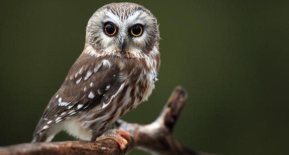

In [8]:
im = Image.open(requests.get("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fbirdwatchinghq.com%2Fwp-content%2Fuploads%2F2020%2F08%2Fnorthern-saw-whet-owl.jpg", stream=True).raw)
im.save(data_dir+"Aegolius_Acadicus.png", "png")
im.reduce(4)

#### 8 : From the data/Chap2/data_world.json file, create a set of publisher type.

In [9]:
with open(data_dir+'data_world.json', 'r', encoding= "utf-8") as fp:
    docs = json.load(fp)    

set_types = set()
for doc in docs:
    set_types.add(doc["publisher"]["@type"])

print(set_types)

{'org:Organization'}


#### 9 : From the data/Chap2/data_world.json file, delete the key of your choice and save the new dict as data_world_cleaned.json.

In [10]:
with open(data_dir+'data_world.json', 'r', encoding= "utf-8") as fp:
    docs = json.load(fp)  

for doc in docs:
    if 'bureauCode' in doc:
        del doc['bureauCode']

with open(data_dir+'data_world_cleaned.json', 'w') as fp:
    json.dump(docs, fp)

#### 10 : From the data/Chap2/data_world.json file, create the co-occurence matrix between "accessLevel" and "accrualPeriodicity".

In [11]:
with open(data_dir+'data_world.json', 'r') as file:
    df = pd.DataFrame(json.load(file))

print("accessLevel has only", len(set(df['accessLevel'])), "modality.")

occurence_vector = pd.crosstab(df['accessLevel'], df['accrualPeriodicity'], dropna=False)
occurence_vector

accessLevel has only 1 modality.


accrualPeriodicity,R/P1D,R/P1M,R/P3M,R/PT1S,irregular,NaN
accessLevel,,,,,,
public,5,3,1,1,4961,29
